# Basics of Machine Learning `part 2`

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Table of Contents
<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Performance metrics in classification](#perf_metrics)
- [Model selection]
- [Regression tasks](#toyexample)

# Realworld dataset

In [2]:
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

from basics.utils import reduce_dataset

We consider here a more complex dataset, stemming from "real-world" data: the **covtype** dataset provided within sklearn. From the sklearn user guide (https://scikit-learn.org/stable/datasets/index.html#covtype-dataset): 
> The samples in this dataset correspond to 30×30m patches of forest in the US, collected for the task of predicting each patch’s cover type, i.e. the dominant species of tree. There are seven covertypes, making this a multiclass classification problem. Each sample has 54 features, described on the dataset’s homepage. Some of the features are boolean indicators, while others are discrete or continuous measurements.

Characteristics:

  | Element | value |
  |---------|---|
  | Classes | 7 |
  | Samples total |	581012 |
  | Dimensionality |	54 |
  | Features | int |
  
 Example of instance: ![](https://archive.ics.uci.edu/ml/assets/MLimages/Large31.jpg)
 
Dataset website: https://archive.ics.uci.edu/ml/datasets/Covertype

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from sklearn import datasets
dataset = datasets.fetch_covtype()

In [5]:
print(dataset.data.shape)

(581012, 54)


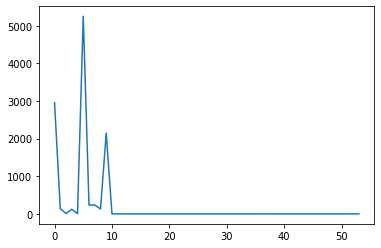

In [6]:
plt.plot(dataset.data[1001])

In [7]:
print(np.unique(dataset.target))

[1 2 3 4 5 6 7]


In [8]:
features = dataset.data
labels = dataset.target

We will select a subset of the dataset in order to be able to have immediate results

In [9]:
[features, labels] = reduce_dataset(features, labels, num_obs=1660)

In [10]:
print(features.shape)
print(labels.shape)

(11620, 54)
(11620,)


<a name="perf_metrics"></a>
# Performance metrics in classification

## Accuracy

We have already mentioned that accuracy is a widely metrics to assess the performance of a model. It counts the number of good predictions among all the predictions

Let us inspect accuracy on the dataset considered. We first split the dataset into a training set and a testing set.

**Good practice**: shuffle the dataset 

In [11]:
import random

In [12]:
indexes = np.arange(len(features.data))
print(indexes)

[    0     1     2 ... 11617 11618 11619]


In [13]:
random.shuffle(indexes)
print(indexes)

[ 7934 11276  8084 ...  1497  6542  9012]


Shuffled dataset:

In [14]:
X = features[indexes]
Y = labels[indexes]

Now we can split between **training set** and **testing set**

In [15]:
train_X = X[:int(0.8 * len(X))]
train_Y = Y[:int(0.8 * len(Y))]

In [16]:
test_X = X[int(0.8 * len(X)):]
test_Y = Y[int(0.8 * len(Y)):]

Inspect total sizes:

In [17]:
print(train_X.shape)
print(test_X.shape)

(9296, 54)
(2324, 54)


Let's get a classifier of our choice (e.g. SVM)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf = KNeighborsClassifier()

In [20]:
clf.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
accuracy = clf.score(test_X, test_Y)
print('accuracy =', accuracy)

accuracy = 0.7930292598967298


**QUESTION: what does it mean?**

## Confusion matrix

It's good to have a statistics on the number of good answers our classifier is able to predict, but if we want to understand its behaviour we need more information. 

A very common metric is to inspect the confusion the classifier is making between classes, it's what we called confusion matrix: it is counting the number of times an instance from class `i` has been predicted as class `j` where `j` can be `i` or another one. 

<img src='./assets/confusion_matrix.png' style="width:20%"></img>

In [22]:
pred_Y = clf.predict(test_X)

In [23]:
print(pred_Y)

[2 2 3 ... 1 4 6]


### Computing the confusion matrix "manually"

In [24]:
classes = np.unique(test_Y)
num_classes = len(classes)
print(num_classes, classes)

7 [1 2 3 4 5 6 7]


In [25]:
confmat = np.zeros((num_classes, num_classes))
for obs_i in range(len(test_X)):
    pred_Y_i = clf.predict([test_X[obs_i]])
    confmat[test_Y[obs_i] - 1, pred_Y_i - 1] += 1

In [26]:
confmat

array([[188.,  59.,   0.,   0.,   9.,   0.,  34.],
       [ 91., 154.,  21.,   0.,  41.,  14.,   7.],
       [  0.,   3., 255.,  29.,   4.,  54.,   0.],
       [  0.,   0.,   7., 322.,   0.,   3.,   0.],
       [  1.,   9.,   8.,   0., 304.,   4.,   0.],
       [  0.,   5.,  33.,  15.,   7., 288.,   0.],
       [ 20.,   2.,   0.,   0.,   1.,   0., 332.]])

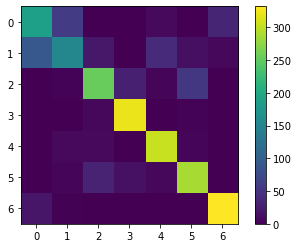

In [27]:
plt.imshow(confmat)
plt.colorbar()

### Using sklearn

Sklearn provides a method for computing confusion matrices, see dedicated page: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
pred_Y = clf.predict(test_X)

In [30]:
confmat = confusion_matrix(test_Y, pred_Y)

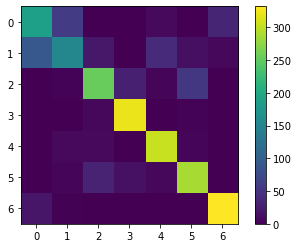

In [31]:
plt.imshow(confmat)
plt.colorbar()

## Additional important metrics

### Notion of true positives and co.

We differentiate between true positives, true negatives, false positives and false negatives.

Definitions. Let consider the case where we have to classify ann image `I` as either a `cat`, a `dog`, or a `donkey`. We first consider the class `cat`:
- **True Positives (TPs)**: we know that an image `I` belongs to class `cat`, and it has been rightly labelled `cat` by the classifier
- **True Negatives (TNs)**: we know that an observation `I` does not belong to class `cat` (in our exemple, it can belong to class `dog` or `donkey`, we don't really care) and it has not been labelled `cat` by the classifier
- **False Positives (TPs)**: we know that an observation `I` does not belong to class `cat` (it belongs to class `dog` or `donkey`), and it has been wrongly labelled `cat` by the classifier
- **False Negatives (TNs)**: we know that an observation `I` belongs to class `cat` and it has not been labelled `cat` by the classifier.

From these categories, we can compute two useful measures: **Precision** and **Recall**. By taking the exemple above:
- Precision is the proportion of images rightly categorized as `cat` among all the instances categorized as a `cat`
- Recall is the proportion of images rightly categorized as `cat` among all instances that should have been categorized as `cat`

From Wikipedia:

<img src="./assets/precisionrecall.png" style="width:30%"></img>

A widely used measure taking into account Precision and Recall is the **F1 Score**:

$$fscore = 2*\frac{precision \times recall}{precision + recall}$$

### Computations

In [32]:
from sklearn.metrics import precision_recall_fscore_support

In [33]:
[precision, recall, _, _] = precision_recall_fscore_support(test_Y, pred_Y)

In [34]:
precision

array([0.62666667, 0.6637931 , 0.78703704, 0.87978142, 0.83060109,
       0.79338843, 0.89008043])

In [35]:
recall

array([0.64827586, 0.4695122 , 0.73913043, 0.96987952, 0.93251534,
       0.82758621, 0.93521127])

Average globally

In [36]:
[precision, recall, _, _] = precision_recall_fscore_support(test_Y, pred_Y, average='macro')

In [37]:
fscore = 2 * (precision * recall) / (precision + recall)

In [38]:
print(fscore)

0.7852303288138607


Looks like the accuracy?....

### Imbalance dataset

So far we made a strong constraint on our datasets : **each class has the same number of observations!**. This is not realistic in real world cases. 

Let's inspect what happens in case of datasets with different number of instance per class. We take the original data, this time we reduce the whole dataset by keeping a certain percentage of the observations per class, and not a fixed number of them. 

In [39]:
features = dataset.data
labels = dataset.target
[features, labels] = reduce_dataset(features, labels, reduce_by=98)

In [40]:
print(features.shape)

(11617, 54)


As before, we shuffle and build the training and testing sets:

In [41]:
indexes = np.arange(len(features.data))
random.shuffle(indexes)

In [42]:
X = features[indexes]
Y = labels[indexes]

In [43]:
train_X = X[:int(0.8 * len(X))]
train_Y = Y[:int(0.8 * len(Y))]

In [44]:
test_X = X[int(0.8 * len(X)):]
test_Y = Y[int(0.8 * len(Y)):]

Inspect number of instances per class:

In [45]:
for c in np.unique(labels):
    idx_train = np.where(train_Y == c)[0]
    idx_test = np.where(test_Y == c)[0]
    print('class', c, '\t num. training obs', len(idx_train), ' | num. testing obs', len(idx_test))

class 1 	 num. training obs 3341  | num. testing obs 895
class 2 	 num. training obs 4556  | num. testing obs 1110
class 3 	 num. training obs 583  | num. testing obs 132
class 4 	 num. training obs 43  | num. testing obs 11
class 5 	 num. training obs 157  | num. testing obs 32
class 6 	 num. training obs 282  | num. testing obs 65
class 7 	 num. training obs 331  | num. testing obs 79


In [46]:
clf = KNeighborsClassifier()

In [47]:
clf.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
accuracy = clf.score(test_X, test_Y)
print('accuracy =', accuracy)

accuracy = 0.8687607573149742


**QUESTIONS:** 
- Do we have a better classifier than before? 
- What does this score mean?

Exercice: plot the confusion matrix and comment

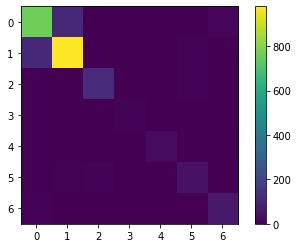

In [49]:
pred_Y = clf.predict(test_X)
confmat = confusion_matrix(test_Y, pred_Y)
plt.imshow(confmat)
plt.colorbar()

Let try to inspect relatively

In [50]:
confmat = np.float32(confmat)

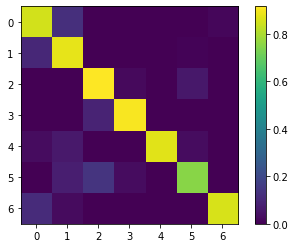

In [51]:
for i in range(len(confmat)):
    confmat[i,:] = confmat[i,:] / np.sum(confmat[i,:])
plt.imshow(confmat)
plt.colorbar()

Accuracy is limited because it does not give insights on performance. 

Let's inspect the fscore:

In [52]:
[precision, recall, _, _] = precision_recall_fscore_support(test_Y, pred_Y, average='macro')
fscore = 2 * (precision * recall) / (precision + recall)

In [53]:
print('accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('fscore:', fscore)

accuracy: 0.8687607573149742
precision: 0.815116724298886
recall: 0.8644252128818284
fscore: 0.8390471619998485


# Model Selection

Comparing SVM with other Classifiers

In machine learning, we usually compare various models in order to pick the best one for a particular application. Model comparison is usually done through cross-validation (see above for details about cross-validation). In the context of this course, for the sake of comparison, we compare classification accuracy for two classifiers: the already presented **Linear SVM** (in sklearn: `svm.SVC(kernel='linear')`) and the (very famous) **k-Nearest Neighbour** (in sklearn: `neighbors.KNeighborsClassifier()`)

In [54]:
from sklearn import neighbors
from sklearn import discriminant_analysis
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Comparing classifiers

In [55]:
classifiers = ['LDA', 'kNN']
all_scores = {'LDA': [], 'kNN': []}

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
splitter = StratifiedKFold(n_splits=10)

In [58]:
count_tests = 0
labels = np.array(labels)
for train_index, test_index in splitter.split(train_X, train_Y):

    # select training and testing datasets
    X_train_i = features[train_index]
    y_train_i = labels[train_index]
    X_test_i = features[test_index]
    y_test_i = labels[test_index]   
    
    count_tests += 1
    
    for clf in classifiers:
        
        # declare classifier
        if (clf=='LDA'): classifier = discriminant_analysis.LinearDiscriminantAnalysis()
        elif (clf=='kNN'): classifier = neighbors.KNeighborsClassifier()

        # train classifier
        classifier.fit(X_train_i, y_train_i)

        # compute score on testing dataset and store it
        score = classifier.score(X_test_i, y_test_i)
        all_scores[clf].append(score)  
    
        # print score
        print('Test', count_tests, ':', clf, 'score: %.2f%%'%(score*100)) 


Test 1 : LDA score: 68.31%
Test 1 : kNN score: 50.64%
Test 2 : LDA score: 63.73%
Test 2 : kNN score: 56.76%
Test 3 : LDA score: 27.50%
Test 3 : kNN score: 50.38%
Test 4 : LDA score: 15.50%
Test 4 : kNN score: 73.41%
Test 5 : LDA score: 51.88%
Test 5 : kNN score: 84.39%
Test 6 : LDA score: 55.44%
Test 6 : kNN score: 48.87%
Test 7 : LDA score: 58.30%
Test 7 : kNN score: 57.97%
Test 8 : LDA score: 72.92%
Test 8 : kNN score: 70.98%
Test 9 : LDA score: 72.71%
Test 9 : kNN score: 88.57%
Test 10 : LDA score: 52.64%
Test 10 : kNN score: 82.63%


In [59]:
np.mean(all_scores['LDA'])

0.5389312242368682

In [61]:
np.mean(all_scores['kNN'])

0.6646050478378819

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@lri.fr))
___